In [3]:
#Source = http://gallery.exactearth.com/
#Florida: Extract AIS Archive for June 1 to 7, 2011.'

In [4]:
import pandas as pd
import geopy
from datetime import datetime
import numpy as np
%matplotlib inline

In [27]:
#read geo file
gdf = pd.read_csv('AIS_Florida_June_2011.csv')
gdf['LONGITUDE'].head()

0   -79.881950
1   -80.520950
2   -79.754893
3   -80.579540
4   -80.400033
Name: LONGITUDE, dtype: float64

In [6]:
#Sort gdf on time, so that time elapsed measure for group by per vessel name is always between earliest and latest transmission'
gdf = gdf.sort(['TIME'], ascending=[True])

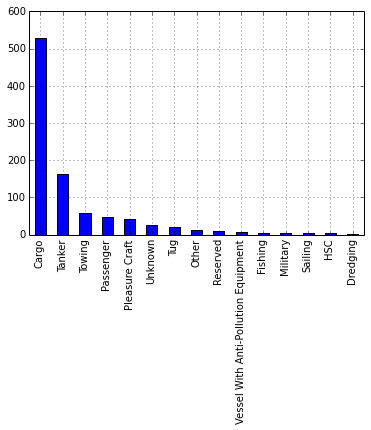

In [7]:
#Histogram by vessel type. 
gdf['TYPE'].value_counts().plot(kind='bar')

In [8]:
# Focus only on important columns. Turn LONGITUDE and LATITUDE columns in to column 'Position' with tuples
gdf_reduced_unique = gdf[['TIME','NAME']]
gdf_reduced_unique['POSITION'] = zip(gdf['LONGITUDE'],gdf['LATITUDE'])
gdf_reduced_unique['POSITION'].head()

374       (-80.12502, 25.15515333)
811           (-80.81735, 24.3857)
795    (-80.33621333, 23.37379167)
812    (-80.81648333, 24.38596667)
375      (-80.04194167, 25.504595)
Name: POSITION, dtype: object

In [9]:
# Measuring distances. See https://github.com/geopy/geopy'
from geopy.distance import vincenty
coord_1 = gdf_reduced_unique['POSITION'][1]
coord_2 = gdf_reduced_unique['POSITION'][2]
vinc_distance = vincenty(coord_1, coord_2).miles

In [10]:
vinc_distance

53.512568614520376

In [11]:
### HELP. Now this is where I would need your help. 
# I would like to group by gdf_reduced_unique by NAME then TIME and afterwards I apply Vincenty distance within each group. 
# Within each group, I would need the POSITION of row i and row i+1 (this I find is the tricky part) in order to run the vincenty distance


In [12]:
### My desired output of the groupy.apply would look like this
exampel_pd = pd.DataFrame ({'NAME':['Vessel1',0,0,'Vessel2',0,0,0],'TIME':[datetime(2015,6,1),datetime(2015,6,2),datetime(2015,6,3),datetime(2015,7,1),datetime(2015,7,2),datetime(2015,7,3),datetime(2015,7,4)],'Distance in Miles':[0,23,10,0,11,23,34]}).set_index('NAME')
exampel_pd.sort(axis = 1,ascending=False)

TIME  Distance in Miles
NAME                                 
Vessel1 2015-06-01                  0
0       2015-06-02                 23
0       2015-06-03                 10
Vessel2 2015-07-01                  0
0       2015-07-02                 11
0       2015-07-03                 23
0       2015-07-04                 34

In [13]:
# Plot coordinates in map

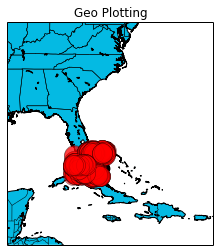

In [36]:
### HELP. Here I would need your help again. Below code works ok, however I would like to plot only a unique vessel's course. I guess, I would need to groupy Name and filter for specific name

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=15,urcrnrlat=40,\
            llcrnrlon=-90,urcrnrlon=-65,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lon = gdf['LONGITUDE'].tolist()
lat = gdf['LATITUDE'].tolist()


# x,y = m(gdf_reduced_unique['POSITION'][1])
# m.plot(x,y,'ro',markersize=20,alpha=.5)

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

plt.title('Geo Plotting')
plt.show()